In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
print(f'tensorflow version {tf.__version__}')
print(f'tensorflow version {tf.keras.__version__}')

tensorflow version 2.12.0
tensorflow version 2.12.0


In [ ]:
os.getcwd

<function posix.getcwd()>

In [ ]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
mnist=tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [ ]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape,X_test.shape,X_train_full[0].shape

((60000, 28, 28), (10000, 28, 28), (28, 28))

In [39]:
X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test/255.

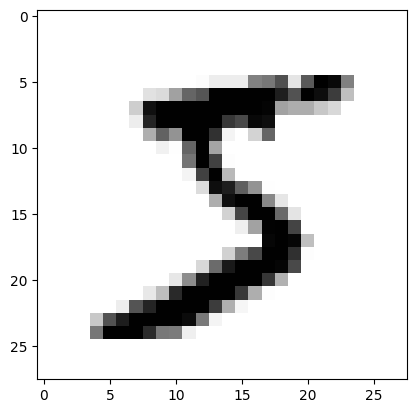

In [ ]:
plt.imshow(X_train_full[0],cmap='binary')

<Axes: >

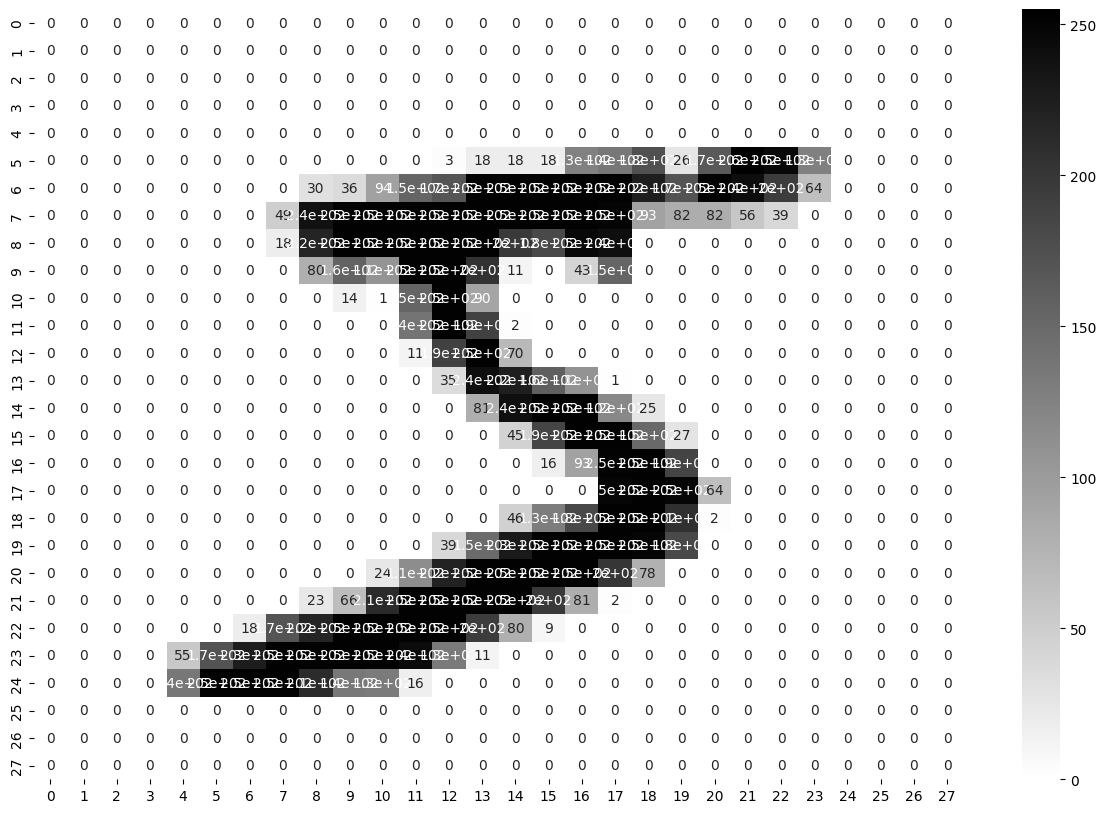

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train_full[0],annot=True,cmap='binary')

In [ ]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
Layers=[    tf.keras.layers.Flatten(input_shape=[28,28],name='InputLayer'),
            tf.keras.layers.Dense(300,activation='relu',name='HiddenLayer1'),
            tf.keras.layers.Dense(100,activation='relu',name='HiddenLayer2'),
            tf.keras.layers.Dense(10,activation='softmax',name='OutputLayer')
        ]
model_clf=tf.keras.models.Sequential(Layers)
model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
784*300+300,300*100+100,100*10+10,(784*300+300+300*100+100+100*10+10)   #(784*300+300+300*100+100+100*10+10)

(235500, 30100, 1010, 266610)

In [ ]:
sum((784*300+300,300*100+100,100*10+10))

266610

In [34]:
hidden1=model_clf.layers[1]
hidden1.name

'HiddenLayer1'

In [35]:
hidden1.get_weights()

[array([[ 0.07293983, -0.06257331,  0.01916745, ..., -0.03757862,
         -0.03556321,  0.00199571],
        [-0.05750268,  0.06184116, -0.00503925, ..., -0.00715627,
         -0.07237781,  0.05894512],
        [ 0.00073117,  0.02923794, -0.00809386, ...,  0.02252615,
         -0.04974677,  0.02371753],
        ...,
        [ 0.06646819,  0.00816395,  0.05015944, ..., -0.02107953,
         -0.02009218, -0.04936939],
        [ 0.06252448, -0.05312867,  0.06179927, ..., -0.02511499,
          0.07267775,  0.00681973],
        [-0.03527892, -0.0514965 ,  0.05152847, ...,  0.05884792,
          0.02599508,  0.04166476]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [36]:
hidden1.get_weights()[0].shape

(784, 300)

In [37]:
weights,biases=hidden1.get_weights()
biases.shape,biases

((300,),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   

In [43]:
loss_function,optimiser,metrics='sparse_categorical_crossentropy','SGD','accuracy'
model_clf.compile(optimizer=optimiser,loss=loss_function,metrics=metrics)

In [66]:
epochs=30
validation_set=(X_valid,y_valid)
history=model_clf.fit(X_train,y_train,validation_data=validation_set,batch_size=32,epochs=epochs)

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0962 - accuracy: 0.9729 - val_loss: 0.1042 - val_accuracy: 0.9706
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0888 - accuracy: 0.9753 - val_loss: 0.0990 - val_accuracy: 0.9734
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0819 - accuracy: 0.9771 - val_loss: 0.0960 - val_accuracy: 0.9724
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0764 - accuracy: 0.9787 - val_loss: 0.0922 - val_accuracy: 0.9742
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0713 - accuracy: 0.9804 - val_loss: 0.0889 - val_accuracy: 0.9746
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0665 - accuracy: 0.9820 - val_loss: 0.0892 - val_accuracy: 0.9752
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0625 - accuracy: 0.9830 - val_loss: 0.0868 - val_accuracy:

In [67]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [68]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.096163,0.972891,0.104238,0.9706
1,0.088758,0.975345,0.098958,0.9734
2,0.081875,0.977091,0.095979,0.9724
3,0.076442,0.978727,0.092238,0.9742
4,0.071306,0.980364,0.088873,0.9746
5,0.066548,0.981982,0.089244,0.9752
6,0.062539,0.982982,0.086755,0.9744
7,0.058453,0.984145,0.083605,0.9772
8,0.055005,0.984909,0.082179,0.9770
9,0.051746,0.986200,0.082126,0.9768


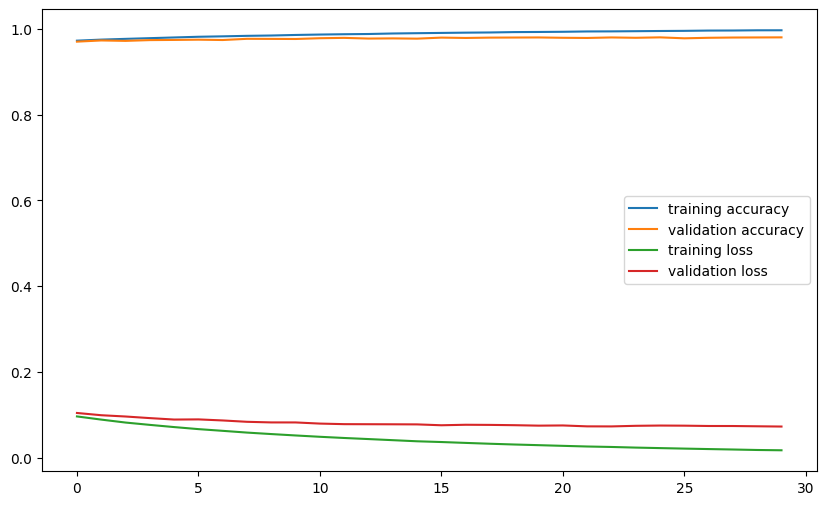

In [69]:
res=pd.DataFrame(history.history)
plt.figure(figsize=(10,6))
plt.plot(res['accuracy'],label='training accuracy')
plt.plot(res['val_accuracy'],label='validation accuracy')
plt.plot(res['loss'],label='training loss')
plt.plot(res['val_loss'],label='validation loss')
plt.legend(loc='center right')     ## this can also be implemented using history.plot

In [70]:
model_clf.evaluate(X_test,y_test)

1719/1719 [==============================] - 3s 2ms/step - loss: 2.5155 - accuracy: 0.0965


[2.5155375003814697, 0.09649091213941574]

SAMPLE CHECK OF TEST DATA

In [56]:
X_new=X_test[:3]
actual=y_test[:3]
actual

array([7, 3, 4], dtype=uint8)

<Axes: >

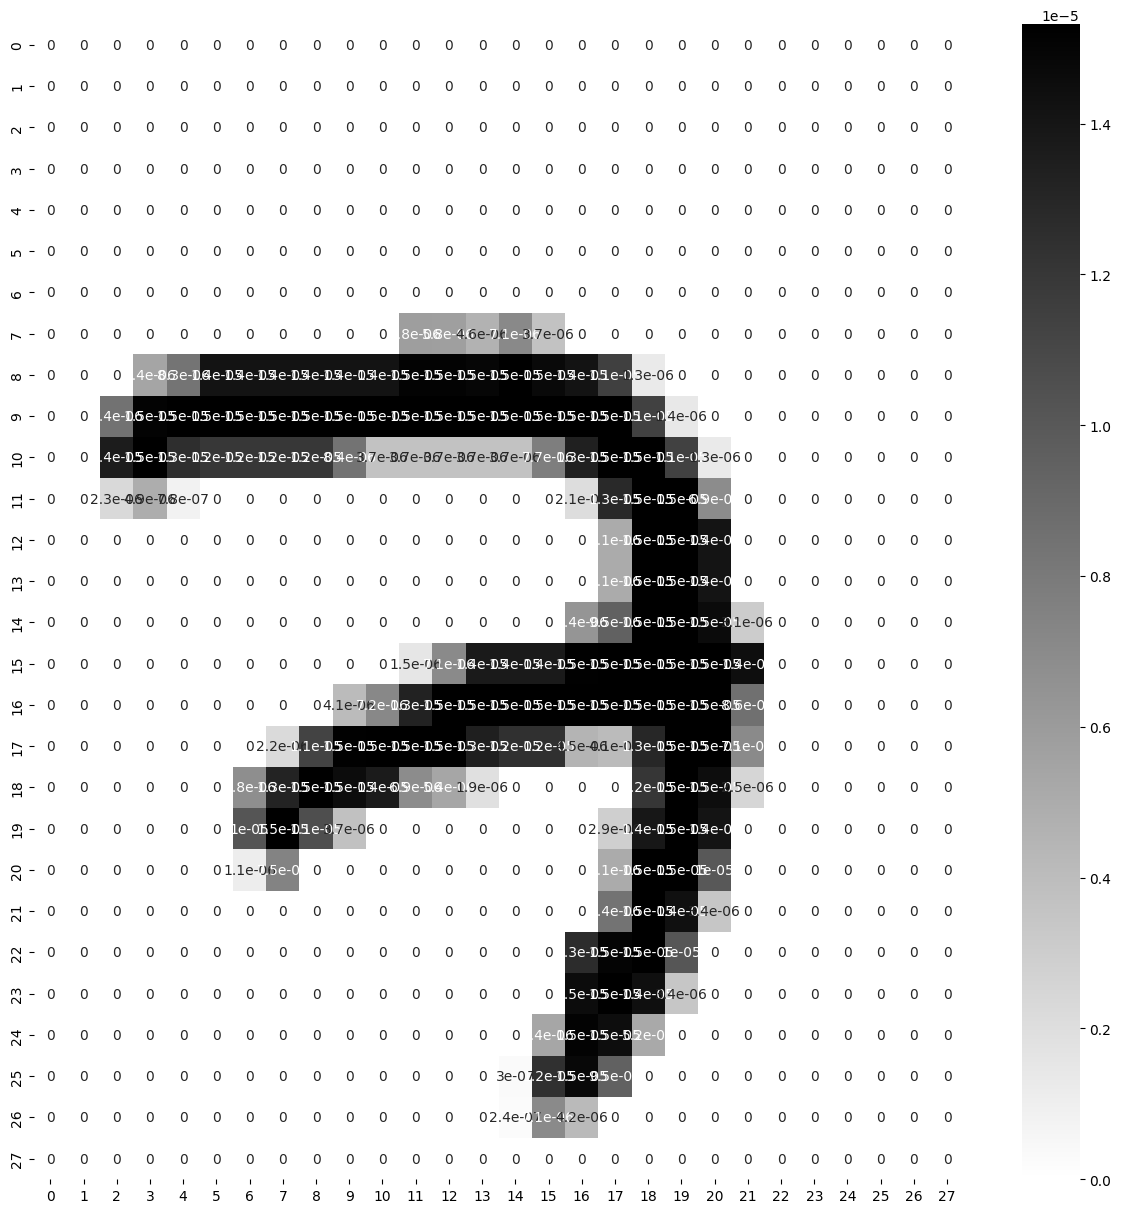

In [58]:
plt.figure(figsize=(15,15))
sns.heatmap(X_test[0],annot=True,cmap='binary')

In [59]:
y_prob=model_clf.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 90ms/step


array([[0.062, 0.101, 0.093, 0.052, 0.142, 0.17 , 0.1  , 0.122, 0.071,
        0.088],
       [0.062, 0.101, 0.092, 0.052, 0.142, 0.17 , 0.1  , 0.122, 0.071,
        0.088],
       [0.062, 0.101, 0.092, 0.052, 0.142, 0.17 , 0.1  , 0.122, 0.071,
        0.088]], dtype=float32)

In [60]:
y_prob

array([[0.06248498, 0.10147956, 0.09250997, 0.05151755, 0.14202066,
        0.16999179, 0.09957638, 0.12165955, 0.07116678, 0.08759275],
       [0.06248686, 0.10148793, 0.09249423, 0.05151724, 0.142025  ,
        0.17000538, 0.09957685, 0.12163487, 0.07117318, 0.08759852],
       [0.06248564, 0.10147556, 0.09249048, 0.05151377, 0.14203627,
        0.17000443, 0.09958156, 0.12164293, 0.07116858, 0.08760083]],
      dtype=float32)

In [63]:
y_pred=np.argmax(y_prob,axis=-1)
actual

array([7, 3, 4], dtype=uint8)

In [64]:
y_pred

array([5, 5, 5])